# 1. Import

In [1]:
import json
import matplotlib.pyplot as plt
from pathlib import Path
import os

# Add project root
project_root = Path(os.getcwd()).parent

# 2. Load Data

In [2]:
# Path to your evaluation JSON
json_path = project_root / "outputs" / "logs" /"evaluation_results_20260103_103542.json" 

with open(json_path, 'r') as f:
    data = json.load(f)

epochs = []
psnr_vals = []
ssim_vals = []

# Parse JSON structure
if "epochs" in data:
    for epoch, metrics in data["epochs"].items():
        epochs.append(int(epoch))
        psnr_vals.append(metrics["metrics"]["psnr_srgan"])
        ssim_vals.append(metrics["metrics"]["ssim_srgan"])

# Sort by epoch
sorted_indices = sorted(range(len(epochs)), key=lambda k: epochs[k])
epochs = [epochs[i] for i in sorted_indices]
psnr_vals = [psnr_vals[i] for i in sorted_indices]
ssim_vals = [ssim_vals[i] for i in sorted_indices]

# 3. Plot Matrics

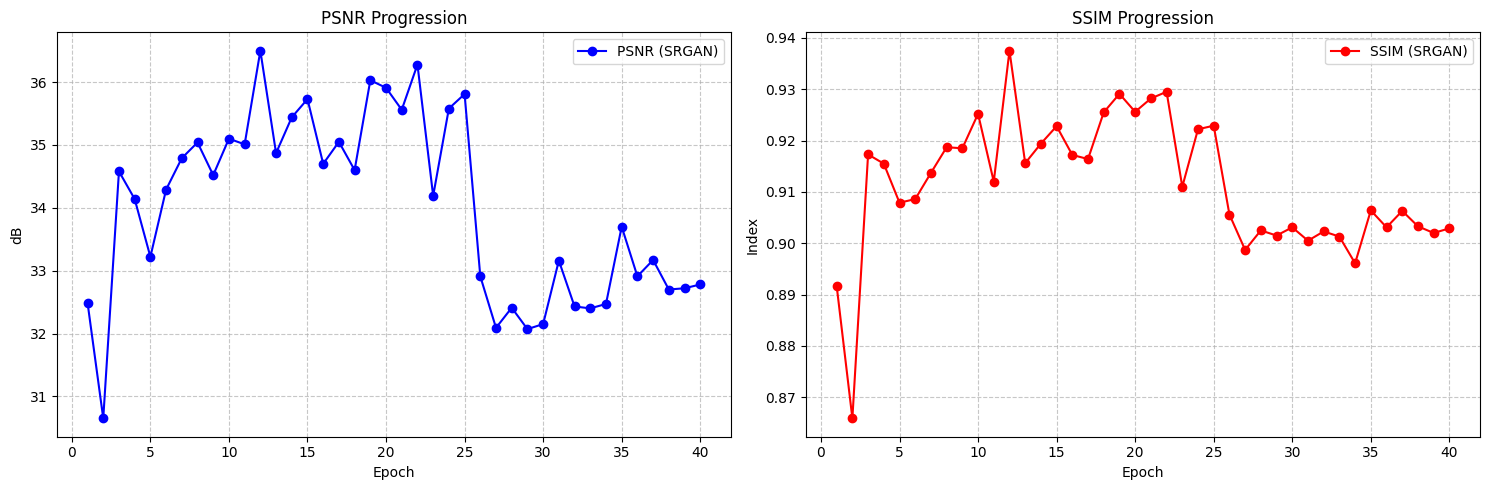

In [3]:
plt.figure(figsize=(15, 5))

# PSNR Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, psnr_vals, marker='o', color='b', label='PSNR (SRGAN)')
plt.title("PSNR Progression")
plt.xlabel("Epoch")
plt.ylabel("dB")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# SSIM Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, ssim_vals, marker='o', color='r', label='SSIM (SRGAN)')
plt.title("SSIM Progression")
plt.xlabel("Epoch")
plt.ylabel("Index")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()